## Introduction to the Sample Final Test

Dear Students,

Welcome to the sample final test for our laboratory course. This test is designed to assess your understanding and application of the concepts and techniques we have covered throughout the semester. 

Instructions:

Read Each Question Carefully: Ensure you understand what is being asked before you start coding.

Write Clean and Commented Code: Your code should be well-organized and include comments explaining your logic.

Test Your Code: Make sure to test your code with different inputs to ensure it works correctly.

Conclusions: Make final decisions, decide about the statistical and practical significance. 

Resources:

You are allowed to use your notes, textbooks, and online resources to help you complete the test. 

**Please be advised that the use of any Generative AI (GenAI) tools is strictly prohibited during this test. This includes, but is not limited to, tools that generate code, text, or any other form of content based on AI algorithms.**

Collaboration with classmates is not permitted. This test is an individual assessment of your skills.

I encourage you to take your time and approach each question methodically. This test is an opportunity to demonstrate your proficiency and understanding of the material. 

Best regards,

Karol
/Mathematical Statistics 2024/2025/



# Task 1: Verify the Hypothesis

Objective: Verify the hypothesis that the salaries of professors working in theoretical departments (B) are much lower than those working in applied departments (A).

In [171]:
import pandas as pd
import numpy as np

# Load the Salaries dataset from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
salaries = pd.read_csv(url)

# Filter the data based on the department type
theoretical_salaries = salaries[salaries['discipline'] == 'B']['salary']
applied_salaries = salaries[salaries['discipline'] == 'A']['salary']

# Display the first few rows of the dataset
salaries

17     103450
18     124750
19     137000
20      89565
21     102580
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 181, dtype: int64

In [164]:
from scipy.stats import shapiro

stat, p = shapiro(salaries['salary'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.9598763278424717, p=6.076052123031469e-09


In [166]:
from scipy.stats import boxcox

t_salaries, _ = boxcox(salaries['salary'])
stat, p = shapiro(t_salaries)
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.9913485882391487, p=0.020271080134795293


In [167]:
from scipy.stats import levene

stat, p_value = levene(t_theoretical_salaries, t_applied_salaries)
print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 286.4828141687703, P-value: 1.0247816132973972e-48


In [169]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(t_theoretical_salaries, t_applied_salaries, equal_var=False, alternative='less')

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value}")

T-statistic: 1589.20, P-value: 1.0


## REJECT H_0

In [ ]:
# 

# Task 2: Verify the Hypothesis

Objective: Verify if the proportion of higher rank professors (associate and full professors) is significantly different between male and female scientists.

In [28]:
from scipy.stats import chi2_contingency
from pandas import crosstab

salaries['higher_rank'] = salaries['rank'].apply(
    lambda x: 'low' if x == 'AssocProf' else 'high' if x == 'Prof' else None)

# def empty_function(value):
#     if value == 'AssocProf':
#         return 'low'
#     elif value == 'Prof':
#         return 'high'
#     else:
#         return None

table = crosstab(salaries['higher_rank'], salaries['sex'])
print(table)

chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 Statistic: {chi2}, Df: {dof}, P-value: {p}")

sex          Female  Male
higher_rank              
high             18   248
low              10    54
Chi2 Statistic: 4.134655979582055, Df: 1, P-value: 0.04201360631381723


# Task 3: Verify the Hypothesis

Objective: Verify if the salaries of professors are significantly different based on rank, gender, and discipline, and check for interactions between these groups.

In [ ]:
# exercise dataset URL:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(salaries['salary'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.9598763278424717, p=6.076052123031469e-09


In [30]:
from scipy.stats import boxcox

salaries['t_salary'], _ = boxcox(salaries['salary'])

stat, p = shapiro(salaries['t_salary'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.9913485882391487, p=0.020271080134795293


In [42]:
column = 'rank'
groups = [salaries[salaries[column] == g]['t_salary'] for g in salaries[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Rank={stat}, p={p}')

column = 'sex'
groups = [salaries[salaries[column] == g]['t_salary'] for g in salaries[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Sex={stat}, p={p}')

column = 'discipline'
groups = [salaries[salaries[column] == g]['t_salary'] for g in salaries[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Disciplin={stat}, p={p}')

Levene Statistic Rank=15.39244267707073, p=3.65975319846777e-07
Levene Statistic Sex=0.1404424384435778, p=0.7080426838760642
Levene Statistic Disciplin=1.4833588695145101, p=0.2239767480337511


In [43]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('t_salary ~ sex + discipline', data=salaries).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

              sum_sq     df          F    PR(>F)
sex         0.002357    1.0   9.265586  0.002492
discipline  0.003334    1.0  13.107670  0.000332
Residual    0.100214  394.0        NaN       NaN


In [48]:
from statsmodels.formula.api import ols

model = ols("t_salary ~ sex + discipline + rank", data=salaries).fit()
robust_model = model.get_robustcov_results(cov_type="HC3")
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:               t_salary   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     211.5
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           1.74e-96
Time:                        20:55:33   Log-Likelihood:                 1220.6
No. Observations:                 397   AIC:                            -2431.
Df Residuals:                     392   BIC:                            -2411.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9158      0.002  

# Task 4: Verify the Hypothesis

Objective: Verify if credit amounts (in DM) are significantly different for people applying with different job, personal status, sex, or age.

In [50]:
import pandas as pd

# Load the GermanCredit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

# Display the first few rows of the dataset
print(germancredit.columns)
germancredit

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,1
996,... < 100 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,...,building society savings agreement/life insurance,40,none,own,1,management/self-employed/highly qualified empl...,1,yes,yes,1
997,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,... >= 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee/official,1,no,yes,1
998,... < 100 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,...,unknown/no property,23,none,for free,1,skilled employee/official,1,yes,yes,0


In [51]:
from scipy.stats import shapiro

stat, p = shapiro(germancredit['amount'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.7933961638083256, p=8.608545621331088e-34


In [52]:
from scipy.stats import boxcox

germancredit['t_amount'], _ = boxcox(germancredit['amount'])

stat, p = shapiro(germancredit['t_amount'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.994295610968472, p=0.0007607681859426297


In [54]:
from scipy.stats import levene

result_col = 't_amount'
column = 'job'
groups = [germancredit[germancredit[column] == g][result_col] for g in germancredit[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Rank={stat}, p={p}')

result_col = 't_amount'
column = 'personal_status_sex'
groups = [germancredit[germancredit[column] == g][result_col] for g in germancredit[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Rank={stat}, p={p}')

Levene Statistic Rank=0.8539458157219052, p=0.464575070406944
Levene Statistic Rank=1.0432200773471447, p=0.3725560351845742


In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('t_amount ~ personal_status_sex + job + age', data=germancredit).fit()
result_table = sm.stats.anova_lm(model, typ=2)

print(result_table)

                         sum_sq     df          F        PR(>F)
personal_status_sex   10.278201    3.0  18.109555  1.907102e-11
job                   20.641029    3.0  36.368216  2.662299e-22
age                    0.877655    1.0   4.639122  3.149133e-02
Residual             187.672122  992.0        NaN           NaN


# Task 5: Evaluate Interaction Between Group and Time

Description: 

The data provide the anxiety score, measured at three time points, of three groups of individuals practicing physical exercises at different levels (grp1: basal, grp2: moderate and grp3: high)

Objective: Evaluate if there is an interaction between group and time in explaining anxiety scores.

In [64]:
import pandas as pd

# Load the anxiety dataset from GitHub
url = "https://raw.githubusercontent.com/kflisikowski/ds/master/anxiety.csv"
anxiety_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(anxiety_data.columns)
anxiety_data

Index(['Unnamed: 0', 'id', 'group', 't1', 't2', 't3'], dtype='object')


,Unnamed: 0,id,group,t1,t2,t3
0,1,1,grp1,14.1,14.4,14.1
1,2,2,grp1,14.5,14.6,14.3
2,3,3,grp1,15.7,15.2,14.9
3,4,4,grp1,16.0,15.5,15.3
4,5,5,grp1,16.5,15.8,15.7
5,6,6,grp1,16.9,16.5,16.2
6,7,7,grp1,17.0,16.8,16.5
7,8,8,grp1,17.0,17.1,16.6
8,9,9,grp1,17.3,16.9,16.5
9,10,10,grp1,17.3,17.1,16.7


In [72]:
anxiety_data_long = anxiety_data.melt(id_vars=['id', 'group'], var_name='Time', value_name='Score',
                                      value_vars=['t1', 't2', 't3'])
print(anxiety_data_long.columns)
anxiety_data_long

Index(['id', 'group', 'Time', 'Score'], dtype='object')


,id,group,Time,Score
0,1,grp1,t1,14.1
1,2,grp1,t1,14.5
2,3,grp1,t1,15.7
3,4,grp1,t1,16.0
4,5,grp1,t1,16.5
...,...,...,...,...
130,41,grp3,t3,14.3
131,42,grp3,t3,13.8
132,43,grp3,t3,15.4
133,44,grp3,t3,15.1


In [73]:
from scipy.stats import shapiro

stat, p = shapiro(anxiety_data_long['Score'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.9869789036748992, p=0.2315522295911077


In [74]:
from scipy.stats import levene

result_col = 'Score'
column = 'Time'
groups = [anxiety_data_long[anxiety_data_long[column] == g][result_col] for g in anxiety_data_long[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Rank={stat}, p={p}')

result_col = 'Score'
column = 'group'
groups = [anxiety_data_long[anxiety_data_long[column] == g][result_col] for g in anxiety_data_long[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Rank={stat}, p={p}')

Levene Statistic Rank=2.3410322270615245, p=0.1002117147887479
Levene Statistic Rank=1.133046926635818, p=0.3251622141515115


In [78]:
import pingouin as pg

anova_results = pg.mixed_anova(dv='Score', within='Time', between='group', subject='id', data=anxiety_data_long)
print(anova_results)

        Source         SS  DF1  DF2         MS           F         p-unc  \
0        group  61.991704    2   42  30.995852    4.351811  1.916093e-02   
1         Time  66.578815    2   84  33.289407  394.909490  1.905584e-43   
2  Interaction  37.153630    4   84   9.288407  110.187610  1.384653e-32   

      p-GG-corr       np2       eps sphericity   W-spher       p-spher  
0           NaN  0.171657       NaN        NaN       NaN           NaN  
1  1.657730e-11  0.903870  0.574434      False  0.259155  2.463413e-13  
2           NaN  0.839924       NaN        NaN       NaN           NaN  


# Task 6: Evaluate the Goodness of Fit

Objective: Use the goodness of fit test to determine whether the distribution of credit amounts for male customers matches that of female customers.

In [254]:
import pandas as pd

# Load the German Credit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

# Display the first few rows of the dataset
print(germancredit.columns)
germancredit


Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,sex,personal_status
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,none,own,2,skilled employee/official,1,yes,yes,1,male,single
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,none,own,1,skilled employee/official,1,no,yes,0,female,divorced/separated/married
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,none,own,1,unskilled - resident,2,no,yes,1,male,single
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,none,for free,1,skilled employee/official,2,no,yes,1,male,single
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,none,for free,2,skilled employee/official,2,no,yes,0,male,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,none,own,1,unskilled - resident,1,no,yes,1,female,divorced/separated/married
996,... < 100 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,...,none,own,1,management/self-employed/highly qualified employee/officer,1,yes,yes,1,male,divorced/separated
997,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,... >= 7 years,4,male : single,none,...,none,own,1,skilled employee/official,1,no,yes,1,male,single
998,... < 100 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,...,none,for free,1,skilled employee/official,1,yes,yes,0,male,single


In [255]:
germancredit[['sex', 'personal_status']] = germancredit['personal_status_sex'].str.split(' : ', n=1, expand=True)

male = germancredit[germancredit['sex'] == 'male']['amount']
female = germancredit[germancredit['sex'] == 'female']['amount']

In [257]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(male, female)
print(f"KS Statistic: {statistic}, p-value: {p_value}")
print('REJECTION! Two sample come from different distributions.' if p_value < 0.05 else 'Womp Womp. Samples can be from teh same distribution.')

KS Statistic: 0.1305750350631136, p-value: 0.0012052294301572195
REJECTION! Two sample come from different distributions.


# Task 7: Evaluate the Change in Asthma Symptoms Over Time

Objective: determine if there is a significant change in asthma symptoms reported by participants at two different time points.

In [94]:
import pandas as pd

# Load the asthma dataset from GitHub
url = "/Users/filip/Downloads/asthma.csv"
asthma_data = pd.read_csv(url, sep=';', ).iloc[:, :2]

print(asthma_data.columns)
asthma_data

Index(['know_begin', 'know_end'], dtype='object')


,know_begin,know_end
0,yes,yes
1,no,no
2,yes,no
3,no,no
4,no,no
...,...,...
81,yes,yes
82,no,yes
83,yes,yes
84,no,no


In [125]:
import numpy as np

table = np.array([[
    asthma_data[(asthma_data['know_begin'] == 'yes') & (asthma_data['know_end'] == 'yes')].shape[0],
    asthma_data[(asthma_data['know_begin'] == 'yes') & (asthma_data['know_end'] == 'no')].shape[0],
],
    [
        asthma_data[(asthma_data['know_begin'] == 'no') & (asthma_data['know_end'] == 'yes')].shape[0],
        asthma_data[(asthma_data['know_begin'] == 'no') & (asthma_data['know_end'] == 'no')].shape[0],
    ]])
print(table)

[[24  6]
 [29 27]]


In [128]:
from pandas import crosstab

table = crosstab(asthma_data['know_begin'], asthma_data['know_end'])
print(table)

know_end    no  yes
know_begin         
no          27   29
yes          6   24


In [130]:
from statsmodels.stats.contingency_tables import mcnemar

result = mcnemar(table, exact=False)
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")

Statistic: 13.82857142857143, p-value: 0.00020026757491720985


# Task 8: Differences of BG readings Over Time 

Objective: determine if there is a significant difference in the blood glucose (BG) readings over multiple time points.

Data: let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.

The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).

In [150]:
# Read dataset from url:
import io
import requests

url = "https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s = requests.get(url).content
df_blood = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col=0)

df_blood.columns = ['before', 'during', 'after']
df_blood['Subject'] = df_blood.index
df_blood['Subject'].astype(str)
print(df_blood.columns)
df_blood

Index(['before', 'during', 'after', 'Subject'], dtype='object')


,before,during,after,Subject
Person ID,,,,
0,89.162573,94.023517,94.594145,0
1,90.857629,95.273755,95.040646,1
2,94.912999,96.612870,95.200472,2
3,95.254064,96.818673,97.205801,3
4,97.136291,97.760342,98.428840,4
5,99.809999,99.169227,98.867769,5
6,101.094087,99.579283,99.790581,6
7,101.531428,99.661758,100.669928,7
8,101.981148,100.812359,101.751155,8


In [151]:
df_blood_long = df_blood.melt(id_vars=['Subject'], var_name='Time', value_name='Score', value_vars=['before', 'during', 'after'])
print(df_blood_long.columns)
df_blood_long

Index(['Subject', 'Time', 'Score'], dtype='object')


,Subject,Time,Score
0,0,before,89.162573
1,1,before,90.857629
2,2,before,94.912999
3,3,before,95.254064
4,4,before,97.136291
...,...,...,...
115,35,after,114.853073
116,36,after,115.123258
117,37,after,118.492357
118,38,after,128.293614


In [152]:
from scipy.stats import shapiro

stat, p = shapiro(df_blood_long['Score'])
print(f'Sharpino Statistic={stat}, p={p}')

Sharpino Statistic=0.9871739373249884, p=0.31865321605674635


In [153]:
from scipy.stats import levene

result_col = 'Score'
column = 'Time'
groups = [df_blood_long[df_blood_long[column] == g][result_col] for g in df_blood_long[column].unique()]
stat, p = levene(*groups)
print(f'Levene Statistic Rank={stat}, p={p}')

Levene Statistic Rank=3.0428265073603664, p=0.051491793394849134


In [159]:
import pingouin as pg

anova_results = pg.rm_anova(data=df_blood_long, dv='Score', subject='Subject', within='Time', detailed=True)
print(anova_results)

  Source          SS  DF         MS          F         p-unc       ng2  \
0   Time  186.374238   2  93.187119  21.211424  4.405982e-08  0.021861   
1  Error  342.673616  78   4.393251        NaN           NaN       NaN   

        eps  
0  0.909247  
1       NaN  


In [157]:
from statsmodels.stats.anova import AnovaRM

rm_anova = AnovaRM(data=df_blood_long, depvar='Score', subject='Subject', within=['Time'])
anova_results = rm_anova.fit()
print(anova_results)

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Time 21.2114 2.0000 78.0000 0.0000



# Task 9: Evaluate the Change in Mice Weights Before and After Treatment

Objective: determine if there is a significant difference in the weights of mice before and after treatment.

In [172]:
import pandas as pd

# Weight of the mice before treatment
before = [200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2, 185.5, 205.2, 193.7]

# Weight of the mice after treatment
after = [392.9, 393.2, 345.1, 393, 434, 427.9, 422, 383.9, 392.3, 352.2]

# Create a data frame
my_data = pd.DataFrame({
    'group': ['before'] * len(before) + ['after'] * len(after),
    'weight': before + after
})

# Display the first few rows of the dataset
print(my_data.columns)
my_data

Index(['group', 'weight'], dtype='object')


,group,weight
0,before,200.1
1,before,190.9
2,before,192.7
3,before,213.0
4,before,241.4
5,before,196.9
6,before,172.2
7,before,185.5
8,before,205.2
9,before,193.7


In [212]:
before = my_data[my_data['group'] == 'before']['weight'].values
after = my_data[my_data['group'] == 'after']['weight'].values

diff = after - before
diff = diff.tolist()
diff = np.array(diff)

In [213]:
from scipy.stats import shapiro

stat, p_value = shapiro(diff)
print(f'Sharpino Statistic={stat}, p={p}')
print('GG: Your data is Normal :)' if p > 0.05 else 'Warning: Your data is CRAZY!')

Sharpino Statistic=0.9453616450080561, p=0.020271080134795293


In [214]:
import numpy as np

transformed_diff = np.sqrt(diff)

from scipy.stats import shapiro

stat, p_value = shapiro(transformed_diff)
print(f'Sharpino Statistic={stat}, p={p}')
print('GG: Your data is Normal :)' if p > 0.05 else 'Warning: Your data is CRAZY!')

Sharpino Statistic=0.9525603087649236, p=0.020271080134795293


In [219]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(after, before, alternative='two-sided')
print(f'Wilcoxon Sign Rank Statistic={stat}, p={p_value}')

Wilcoxon Sign Rank Statistic=0.0, p=0.001953125


# Task 10: Calculate Effect Size and Power 

Objective: Use Python to calculate the effect size and power for a test comparing the total bill amounts between smokers and non-smokers. Interpret your results. If the power is not satisfactory - how many observations should we sample to achieve 90% power?

The tips dataset contains information about tips received by waitstaff in a restaurant, including various attributes such as total bill, tip amount, sex of the bill payer, whether the payer is a smoker, day of the week, time of day, and size of the party.

The tips dataset contains the following columns:

total_bill: The total bill amount (including tip) in dollars.

tip: The tip amount in dollars.

sex: The sex of the bill payer (Male or Female).

smoker: Whether the bill payer is a smoker (Yes or No).

day: The day of the week (Thur, Fri, Sat, Sun).

time: The time of day (Lunch or Dinner).

size: The size of the party.

In [227]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.columns)
tips

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [225]:
from scipy.stats import shapiro

stat, p_value = shapiro(tips['total_bill'])
print(f'Sharpino Statistic: {stat}, p: {p_value}')
print('GG: Your data is Normal :)' if p_value > 0.05 else 'Warning: Your data is CRAZY!')

Sharpino Statistic: 0.9197187941346582, p: 3.324539186808909e-10


In [229]:
from scipy.stats import boxcox

tips['trans_total_bill'], _ = boxcox(tips['total_bill'])

stat, p_value = shapiro(tips['trans_total_bill'])
print(f'Sharpino Statistic: {stat}, p: {p_value}')
print('GG: Your data is Normal :)' if p_value > 0.05 else 'Warning: Your data is CRAZY!')

Sharpino Statistic: 0.9922448347667507, p: 0.22873164746664976
GG: Your data is Normal :)


In [232]:
from scipy.stats import ttest_ind

smokers = tips[tips['smoker'] == 'Yes']['trans_total_bill']
non_smokers = tips[tips['smoker'] == 'No']['trans_total_bill']

# Ha: data_1.mean() != data_2.mean()
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=True, alternative='two-sided')
print(f"T-statistic: {t_stat:.2f}, p: {p_value}")
print('REJECTION! Two means are not the same!' if p_value < 0.05 else 'Womp Womp. Two means can be the same.')

T-statistic: 0.90, p: 0.36901583540636074
Womp Womp. Two means can be the same.


In [235]:
from statsmodels.stats.power import TTestIndPower

mean1, mean2 = np.mean(smokers), np.mean(non_smokers)
std1, std2 = np.std(smokers, ddof=1), np.std(non_smokers, ddof=1)
n1, n2 = len(smokers), len(non_smokers)

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

cohens_d = (mean1 - mean2) / pooled_std
print(f"Cohen's d (Effect Size): {cohens_d}")

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=cohens_d, nobs1=n1, ratio=n2/n1, alpha=0.05, alternative='two-sided')
print(f"Power of the test: {power}")

Cohen's d (Effect Size): 0.11863331797302999
Power of the test: 0.2329257248923487


In [237]:
power = 0.9
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=cohens_d, power=power, ratio=n2/n1, alpha=0.05, alternative='two-sided')
print(f"Required sample size per group to achieve power of 0.9: {sample_size:.2f}")

Required sample size per group to achieve power of 0.9: 1207.14


# Task 11: 2-way Anova

Objective: Three teachers graded final exams for students, and each exam varied in difficulty (Easy, Medium, Hard). We are interested in investigating whether there are differences in scores based on:
1.	The teacher grading the exam.
2.	The difficulty level of the exam.
3.	The interaction between teacher and difficulty level.


In [242]:
import pandas as pd

# Dane
data = {
    'Teacher': ['Teacher 1'] * 15 + ['Teacher 2'] * 15 + ['Teacher 3'] * 15,
    'Difficulty': ['Easy'] * 5 + ['Medium'] * 5 + ['Hard'] * 5 +
                  ['Easy'] * 5 + ['Medium'] * 5 + ['Hard'] * 5 +
                  ['Easy'] * 5 + ['Medium'] * 5 + ['Hard'] * 5,
    'Scores': [78, 82, 85, 80, 79, 70, 75, 73, 72, 74, 60, 65, 62, 63, 61,
               80, 85, 83, 81, 82, 72, 74, 75, 73, 71, 63, 64, 66, 62, 65,
               81, 83, 82, 84, 85, 73, 71, 74, 72, 70, 64, 63, 62, 65, 66]
}
df = pd.DataFrame(data)

df

,Teacher,Difficulty,Scores
0,Teacher 1,Easy,78
1,Teacher 1,Easy,82
2,Teacher 1,Easy,85
3,Teacher 1,Easy,80
4,Teacher 1,Easy,79
5,Teacher 1,Medium,70
6,Teacher 1,Medium,75
7,Teacher 1,Medium,73
8,Teacher 1,Medium,72
9,Teacher 1,Medium,74


In [243]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['Scores'])
print(f'Sharpino Statistic: {stat}, p: {p_value}')
print('GG: Your data is Normal :)' if p > 0.05 else 'Warning: Your data is CRAZY!')

Sharpino Statistic: 0.9287798621911684, p: 0.008494792325463792


In [244]:
from scipy.stats import boxcox

df['trans_Scores'], _ = boxcox(df['Scores'])

stat, p_value = shapiro(df['trans_Scores'])
print(f'Sharpino Statistic: {stat}, p: {p_value}')
print('GG: Your data is Normal :)' if p > 0.05 else 'Warning: Your data is CRAZY!')

Sharpino Statistic: 0.9291432875058176, p: 0.008748581858556218


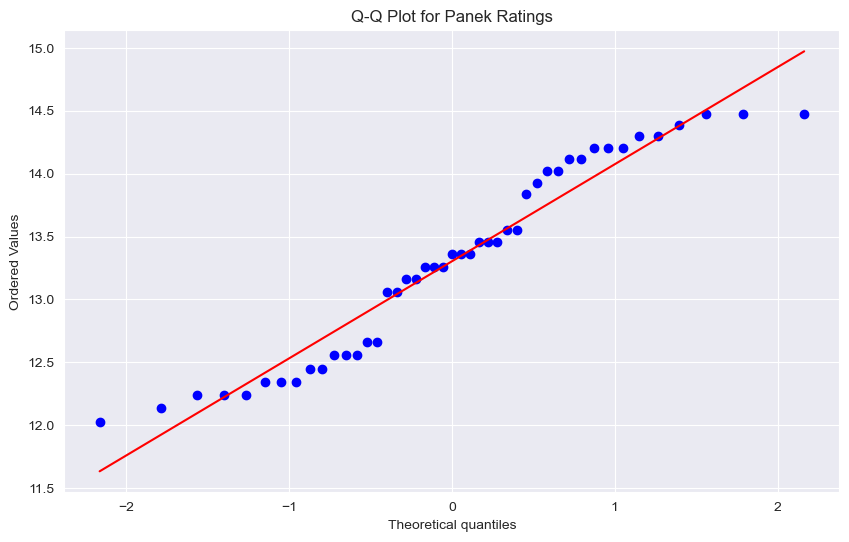

In [245]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df['trans_Scores'], dist=stats.norm, plot=plt)
plt.title("Q-Q Plot for Panek Ratings")
plt.show()

In [246]:
from scipy.stats import levene

result_col = 'trans_Scores'
column = 'Difficulty'
groups = [df[df[column] == g][result_col] for g in df[column].unique()]
stat, p_value = levene(*groups)
print(f'Levene Statistic Rank: {stat}, p: {p_value}')
print('Warning: Your variances are not the same!' if p_value < 0.05 else 'GG: Your variances are similar.')

result_col = 'trans_Scores'
column = 'Teacher'
groups = [df[df[column] == g][result_col] for g in df[column].unique()]
stat, p_value = levene(*groups)
print(f'Levene Statistic Rank: {stat}, p: {p_value}')
print('Warning: Your variances are not the same!' if p_value < 0.05 else 'GG: Your variances are similar.')

Levene Statistic Rank: 0.29509179735445235, p: 0.7459940130775151
GG: Your variances are similar.
Levene Statistic Rank: 0.018475429491573134, p: 0.9817021687808244
GG: Your variances are similar.


In [248]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('trans_Scores ~ Teacher + Difficulty', data=df).fit()
result_table = sm.stats.anova_lm(model, typ=2)
print(result_table)

               sum_sq    df           F        PR(>F)
Teacher      0.119297   2.0    1.816401  1.757672e-01
Difficulty  24.806198   2.0  377.695900  1.070478e-26
Residual     1.313554  40.0         NaN           NaN


# Task 12: Mantel-Haenszel test

Objective: use the Mantel-Haenszel test to determine if there is a significant difference in the changes in doctoral program completion status between male and female students, controlling for the time variable (initial and final status).

Gdańsk Tech classified students entering the PhD programs in a given year by their status 6 years later, with the data broken down by gender. The initial and final status of students is as follows: Men: 15 completed, 5 not completed, Women: 10 completed, 10 not completed. Final Status: Men: 12 completed, 8 not completed, Women: 8 completed, 12 not completed. Determine if there is a significant difference in the changes of doctoral program completion status between male and female students.


In [253]:
import statsmodels.api as sm

tables = [
#    factor1  factor2
    [[15, 5], [10, 10]], # Stratum 1
    [[12, 8], [8, 12]],  # Stratum 2
]

result = sm.stats.StratifiedTable(tables)
print(f"(Mantel-Haenszel) Common Odds Ratio: {result.oddsratio_pooled}, P-Value: {result.test_null_odds().pvalue}")
print('REJECTION! Your factor influences change in Stratum.' if result.test_null_odds().pvalue < 0.05 else 'Womp Womp. There is no statistical evidence to say factor influences change in Stratum')

(Mantel-Haenszel) Common Odds Ratio: 2.578947368421052, P-Value: 0.04349319071383084
REJECTION! Your factor influences change in Stratum.
